In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
# 載入 MNIST 資料集
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 影像資料預處理
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

In [13]:
# 定義 CNN 模型
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 輸出層，10個類別
])

In [14]:
# 編譯模型
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 設定早停（EarlyStopping）防止過擬合
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 訓練模型
history = model.fit(x_train, y_train, epochs=20, batch_size=64, 
                    validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1826 - accuracy: 0.9445 - val_loss: 0.0535 - val_accuracy: 0.9837
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0512 - accuracy: 0.9839 - val_loss: 0.0334 - val_accuracy: 0.9883
Epoch 3/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0353 - accuracy: 0.9888 - val_loss: 0.0346 - val_accuracy: 0.9883
Epoch 4/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0269 - accuracy: 0.9914 - val_loss: 0.0336 - val_accuracy: 0.9899
Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0219 - accuracy: 0.9928 - val_loss: 0.0327 - val_accuracy: 0.9889
Epoch 6/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0191 - accuracy: 0.9935 - val_loss: 0.0291 - val_accuracy: 0.9913
Epoch 7/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0150 - accuracy: 0.9949 - val_loss: 0.0278 - val_accuracy: 0.9908
Epoch 

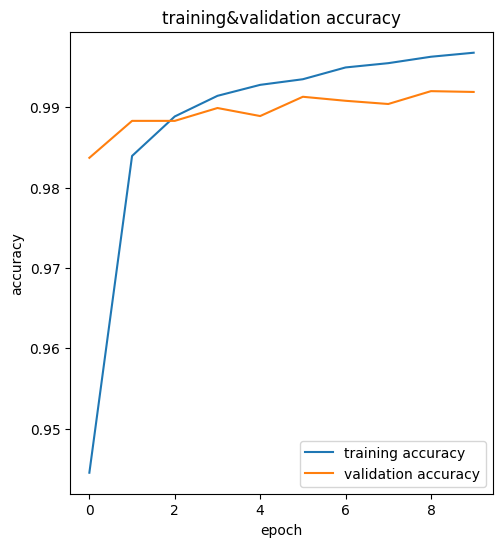

In [18]:
# 顯示訓練與驗證準確度圖
plt.figure(figsize=(12, 6))

# 訓練與驗證準確度
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('training&validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

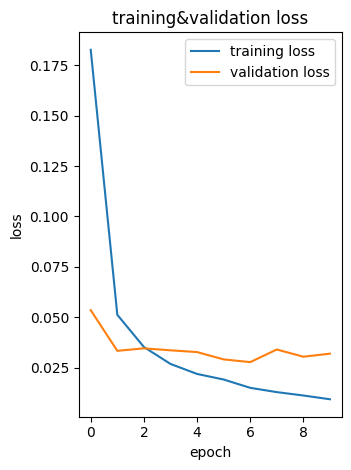

In [19]:
# 訓練與驗證損失
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('training&validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.tight_layout()
plt.show()

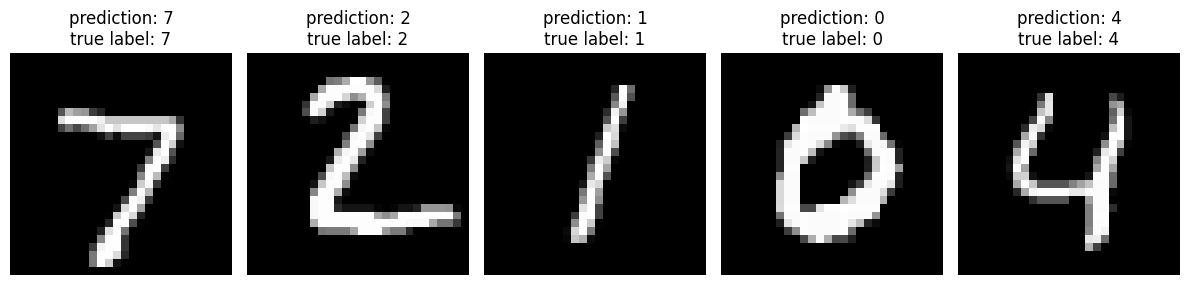

In [20]:
# 顯示幾個預測結果與真實標籤
predictions = model.predict(x_test[:5])  # 預測前5個測試樣本
plt.figure(figsize=(12, 6))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"prediction: {np.argmax(predictions[i])}\ntrue label: {y_test[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [27]:
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
# 載入 CIFAR-10 資料集
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 正規化影像資料
x_train, x_test = x_train / 255.0, x_test / 255.0

In [28]:
# 定義資料擴增
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 將資料增強應用於訓練資料
datagen.fit(x_train)

In [29]:
# 建立模型
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


In [31]:
# 編譯模型
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 使用早停策略
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 訓練模型
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=10, 
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/10
782/782 [==============================] - 28s 35ms/step - loss: 1.9930 - accuracy: 0.0883 - val_loss: 1.9022 - val_accuracy: 0.0686
Epoch 2/10
782/782 [==============================] - 27s 34ms/step - loss: 1.9772 - accuracy: 0.0930 - val_loss: 1.9377 - val_accuracy: 0.0226
Epoch 3/10
782/782 [==============================] - 27s 35ms/step - loss: 1.9713 - accuracy: 0.0863 - val_loss: 1.8696 - val_accuracy: 0.0525
Epoch 4/10
782/782 [==============================] - 27s 35ms/step - loss: 1.9613 - accuracy: 0.0820 - val_loss: 1.8512 - val_accuracy: 0.0550
Epoch 5/10
782/782 [==============================] - 27s 35ms/step - loss: 1.9626 - accuracy: 0.0832 - val_loss: 1.8949 - val_accuracy: 0.0688
Epoch 6/10
782/782 [==============================] - 27s 35ms/step - loss: 1.9541 - accuracy: 0.0846 - val_loss: 1.8337 - val_accuracy: 0.0316
Epoch 7/10
782/782 [==============================] - 27s 35ms/step - loss: 1.9456 - accuracy: 0.0792 - val_loss: 1.7913 - val_accuracy:

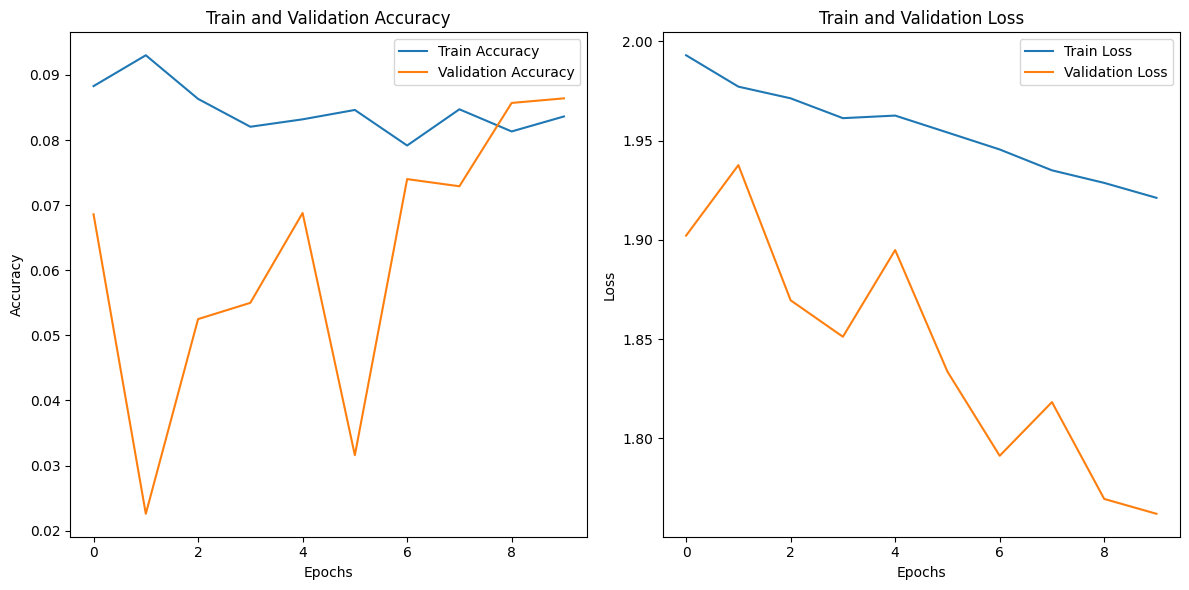

In [32]:
# 繪製訓練過程中的準確度與損失圖
def plot_history(history):
    # 訓練與驗證準確度
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Train and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # 訓練與驗證損失
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Train and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

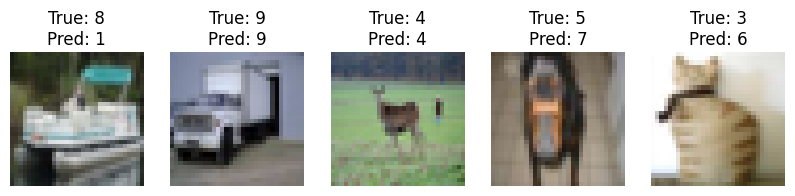

In [33]:
# 顯示幾張圖片和預測結果
def show_predictions(x_test, y_test, model):
    # 隨機選擇一些圖片
    num_images = 5
    random_indices = np.random.choice(len(x_test), num_images)

    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(random_indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(x_test[idx])
        plt.title(f"True: {y_test[idx][0]}\nPred: {np.argmax(model.predict(x_test[idx:idx+1]))}")
        plt.axis('off')
    plt.show()

show_predictions(x_test, y_test, model)